<a href="https://colab.research.google.com/github/satuelisa/ICN2024/blob/main/S5_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 5
## Community detection in networks

In [1]:
import networkx as nx
import numpy as np

In [2]:
n = 300
pos = np.random.random((n, 2)) # x and y positions
k = 7 # groups
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters = k, n_init = 'auto').fit(pos)
leaders = clustering.cluster_centers_
groups = clustering.labels_

In [3]:
G = nx.Graph()

for point in range(n):
  coords = pos[point,:]
  G.add_node(point, pos = coords)

i = 0
for center in leaders:
  G.add_node(f'C{i}', pos = center)
  i += 1

In [4]:
import seaborn as sns
colors = sns.color_palette('husl', k)
colors

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7757319041862729, 0.5784925270759935, 0.19475566538551875),
 (0.5105309046900421, 0.6614299289084904, 0.1930849118538962),
 (0.20433460114757862, 0.6863857739476534, 0.5407103379425205),
 (0.21662978923073606, 0.6676586160122123, 0.7318695594345369),
 (0.5049017849530067, 0.5909119231215284, 0.9584657252128558),
 (0.9587050080494409, 0.3662259565791742, 0.9231469575614251)]

In [5]:
ca = []
for v in G.nodes():
  if 'C' not in str(v):
    ca.append(colors[groups[v]]) # points
  else:
    ca.append(colors[int(v[1:])]) # centers

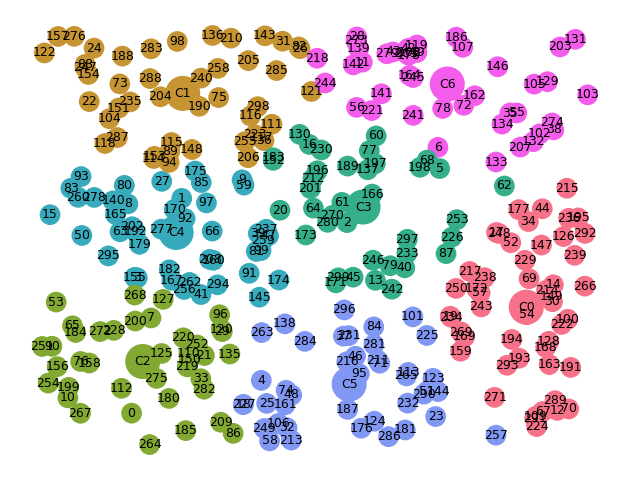

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (4, 3), dpi =  150)
coords = nx.get_node_attributes(G, 'pos')

sizes = [80] * n + [250] * k

nx.draw(G, coords, node_color = ca, node_size = sizes)
l = nx.draw_networkx_labels(G, pos = coords, font_size = 6)

In [7]:
G2 = nx.ring_of_cliques(7, 12)
clusters = nx.community.greedy_modularity_communities(G2)
for c in clusters:
  print(c)

frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11})
frozenset({12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23})
frozenset({32, 33, 34, 35, 24, 25, 26, 27, 28, 29, 30, 31})
frozenset({36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47})
frozenset({48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59})
frozenset({64, 65, 66, 67, 68, 69, 70, 71, 60, 61, 62, 63})
frozenset({72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83})


In [8]:
cc = sns.color_palette('hls', len(clusters))
cv = dict()
i = 0
for cluster in clusters:
  color = cc[i]
  i += 1
  for v in cluster:
    cv[v] = color

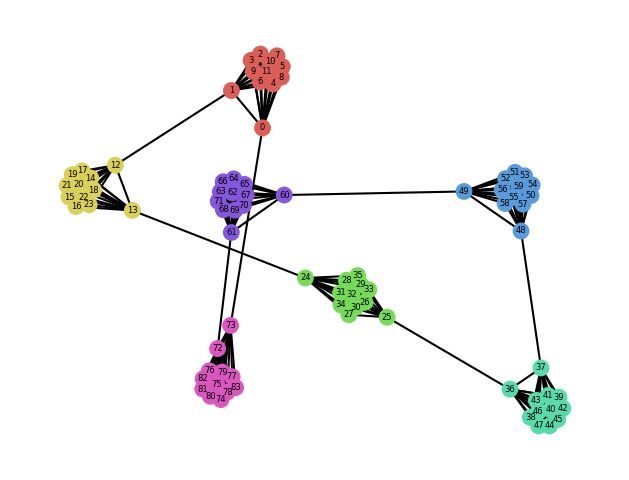

In [10]:
fig = plt.figure(1, figsize = (4, 3), dpi =  150)
pos = nx.spring_layout(G2)
nx.draw(G2, pos, node_color = [ cv.get(v, 'gray') for v in G2.nodes ], node_size = 50)
l = nx.draw_networkx_labels(G2, pos, font_size = 4)